# Salary Predction 

## Define the problem 
### As a Data scientist, how would you examine a set of job postings and then predict salaries for a new set of job postings?

### You must build a model to predict the salaries for the job postings contained in test_features.csv. The output of your system should be a CSV file entitled test_salaries.csv where each row has the following format: jobId, salary


In [0]:
from IPython.display import Image

In [2]:
Image(url = "https://insights.dice.com/wp-content/uploads/2019/01/Salary-Increase-Pay-Raise-Better-Pay-Dice.png")

## 1. Explore Data Analysis

## 1.1 Load the Data

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive 
drive.mount('/content/gdrive')


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Read in files and print in info
train_feature=pd.read_csv('gdrive/My Drive/train_features.csv')
test_feature=pd.read_csv('gdrive/My Drive/test_features.csv')
target_feature = pd.read_csv('gdrive/My Drive/train_salaries.csv')

## 1.2 Examine the data

In [5]:
train_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [6]:
test_feature.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44


In [7]:
target_feature.head()

,jobId,salary
0,JOB1362684407687,130
1,JOB1362684407688,101
2,JOB1362684407689,137
3,JOB1362684407690,142
4,JOB1362684407691,163


In [8]:
train_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [9]:
test_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 61.0+ MB


In [10]:
target_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   jobId   1000000 non-null  object
 1   salary  1000000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [11]:
train_feature.duplicated().sum()

0

In [12]:
test_feature.duplicated().sum()

0

In [13]:
target_feature.duplicated().sum()

0

### 1.2.1 Identify numerical and categorical variables

In [14]:
train_feature.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis'],
      dtype='object')

In [0]:
numerical_cols = ['yearsExperience','milesFromMetropolis']

In [0]:
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']

### 1.2.2 Summarize numerical and categorical variables

In [17]:
train_feature.describe(include = [np.number])

,yearsExperience,milesFromMetropolis
count,1000000.000000,1000000.000000
mean,11.992386,49.529260
std,7.212391,28.877733
min,0.000000,0.000000
25%,6.000000,25.000000
50%,12.000000,50.000000
75%,18.000000,75.000000
max,24.000000,99.000000


In [18]:
train_feature.describe(include = ['O']) # include categorical columns

,jobId,companyId,jobType,degree,major,industry
count,1000000,1000000,1000000,1000000,1000000,1000000
unique,1000000,63,8,5,9,7
top,JOB1362685275061,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,16193,125886,236976,532355,143206


## 1.3 Merge features and targets into single dataframe

In [0]:
#Merge the features and salaries on jobId,delete original file to save memory
train = pd.merge(train_feature,target_feature, on='jobId')

In [0]:
del train_feature
del target_feature

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


In [22]:
train.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


## 1.4 Visualize target variable (salary)

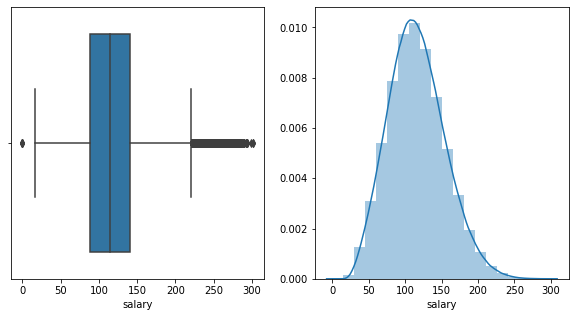

In [23]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.boxplot(train.salary)
plt.subplot(1,2,2)
sns.distplot(train.salary,bins = 20)
plt.show()

## 1.5 Examine potential outliers

### 1.5.1 USE IQR rule to identify potential outliers

In [24]:
stat = train.salary.describe()
print(stat)
IQR = stat['75%']- stat['25%']
Upper = stat['75%']+ 1.5 * IQR
Lower = stat['25%']- 1.5 * IQR
print('The Upper and Lower bounds for suspected outliers are {} and {}'.format(Upper,Lower))

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64
The Upper and Lower bounds for suspected outliers are 220.5 and 8.5


### 1.5.2 Identify potential outliers

In [25]:
train[train.salary <8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [26]:
train.loc[train.salary>222.5,'jobType'].value_counts()

CEO               2893
CFO               1308
CTO               1298
VICE_PRESIDENT     520
MANAGER            188
SENIOR              50
JUNIOR              16
Name: jobType, dtype: int64

In [27]:
train[(train.salary >222.5) & (train.jobType == 'JUNIOR')]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
1222,JOB1362684408909,COMP40,JUNIOR,MASTERS,COMPSCI,OIL,24,5,225
27710,JOB1362684435397,COMP21,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,3,246
31355,JOB1362684439042,COMP45,JUNIOR,DOCTORAL,COMPSCI,FINANCE,24,0,225
100042,JOB1362684507729,COMP17,JUNIOR,DOCTORAL,BUSINESS,FINANCE,23,8,248
160333,JOB1362684568020,COMP18,JUNIOR,DOCTORAL,BUSINESS,FINANCE,22,3,223
303778,JOB1362684711465,COMP51,JUNIOR,MASTERS,ENGINEERING,WEB,24,2,226
348354,JOB1362684756041,COMP56,JUNIOR,DOCTORAL,ENGINEERING,OIL,23,25,226
500739,JOB1362684908426,COMP40,JUNIOR,DOCTORAL,ENGINEERING,OIL,21,0,227
627534,JOB1362685035221,COMP5,JUNIOR,DOCTORAL,ENGINEERING,OIL,24,29,230
645555,JOB1362685053242,COMP36,JUNIOR,DOCTORAL,BUSINESS,FINANCE,24,1,225


The observations with zero salaries don't seem to be a intern or volunteer positions. I am confident that these entries are missing or corrupt data and are supposed to be removed from training set.

The high-salary potential outliers all appear to be plausible. Most roles are senior executive roles and the junior roles are coming from industries that are famous for high salaries (oil,finance). I determine that thest entries to be legitimate and won't remove them. 

In [0]:
# Remove the data with zero salaries
train = train[train.salary>8.5]

In [0]:
def feature_plot (df,col):
    '''Make plot for each features
    left, the distribution of samples on the feature
    right,the dependance of salary on the feature'''
    plt.figure(figsize = (14,6))
    plt.subplot(1,2,1)
    if df[col].dtype =='int64':
        df[col].value_counts().sort_index().plot()
    else: 
        #change the categorical data to category type and order their level by the mean salary
        mean= df.groupby(col)['salary'].mean()
        df[col] = df[col].astype('category')
        levels = mean.sort_values().index.tolist()
        df[col].cat.reorder_categories(levels,inplace = True)
        df[col].value_counts().plot()
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Counts')
    plt.subplot(1, 2, 2)
    if df[col].dtype =='int64' or col =='companyId':
        #plot the mean salary for each category and fill between the (mean-std, mean+std)
        mean = df.groupby(col)['salary'].mean()
        std = df.groupby(col)['salary'].std()
        mean.plot()
        plt.fill_between(range(len(std.index)),mean.values-std.values,mean.values+ std.values, 
                        alpha = 0.1)
    else:
        sns.boxplot( x= col, y = 'salary',data = df)
        plt.xticks(rotation=45)
        plt.ylabel('Salaries')
        plt.show()

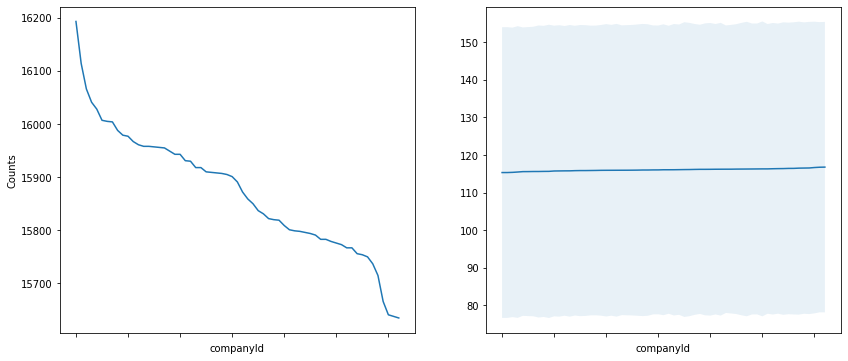

In [30]:
feature_plot(train,'companyId')

##### The salary doesn't show the strong asscoiation with companies.

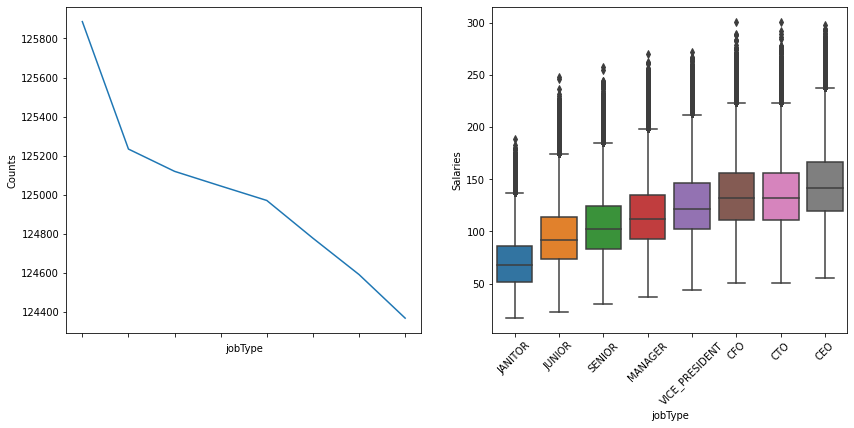

In [31]:
feature_plot(train,'jobType')

##### We can see a clear positive correlation between job types and salary. 

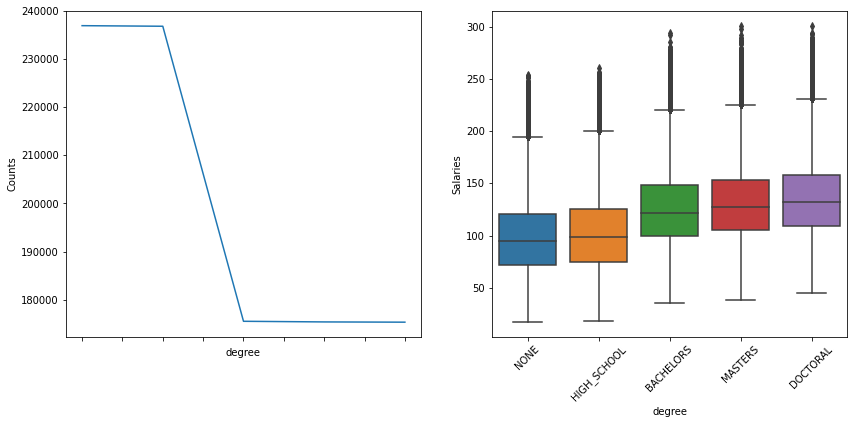

In [32]:
feature_plot(train,'degree')

##### More advanced degrees seem to correspond to greater compensations. 

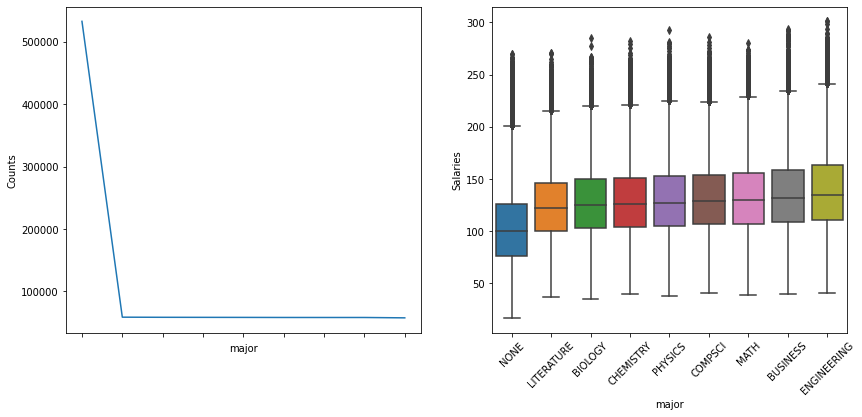

In [33]:
feature_plot(train, 'major')

##### People who major in Engineering,Business and math generally have higher salaries.

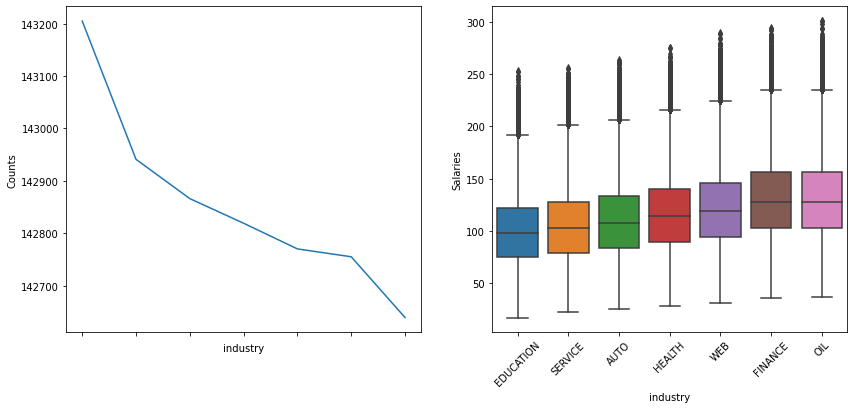

In [34]:
feature_plot(train,'industry')

##### Regarding industries, oil ,finance and web industries offer better generally.

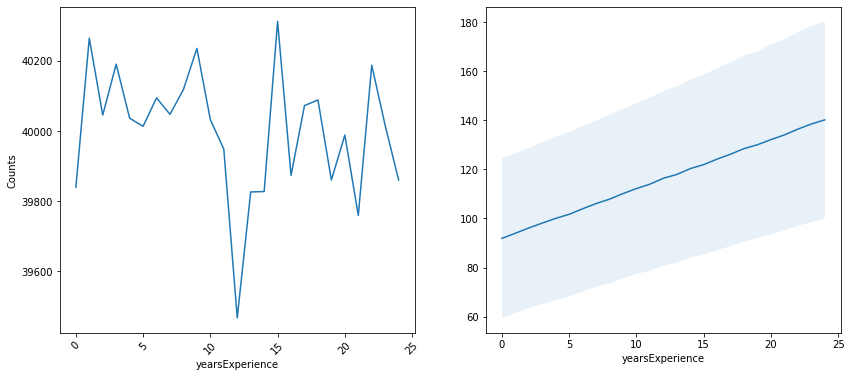

In [35]:
feature_plot(train,'yearsExperience')

##### Generally speaking, it seems that salary and years of experience have a positive correlation.

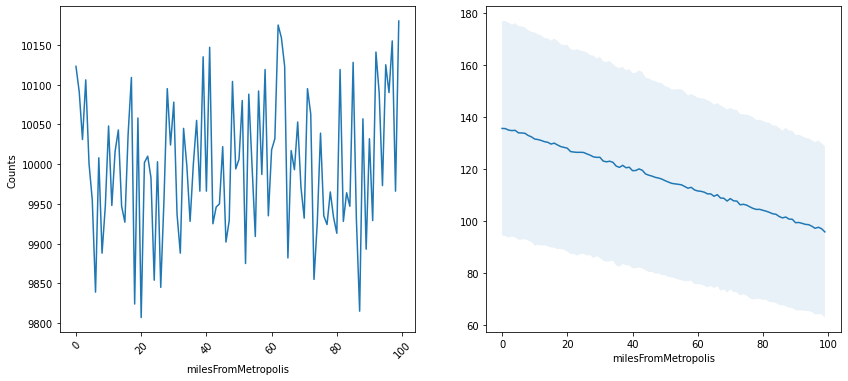

In [36]:
feature_plot(train,'milesFromMetropolis')

##### The graph indicates that there's a negative correlation between salaries and distances to metropolis. 

In [0]:
def label_encode(df,col):
    # encode the categories using average salary for each category to replace labels 
    cat_dict = {}
    cats = df[col].cat.categories.tolist()
    for cat in cats:
        cat_dict[cat] = train[train[col] == cat]['salary'].mean()
    df[col] = df[col].map(cat_dict)

In [0]:
for col in train.columns:
    if train[col].dtype.name =="category":
        label_encode(train,col)

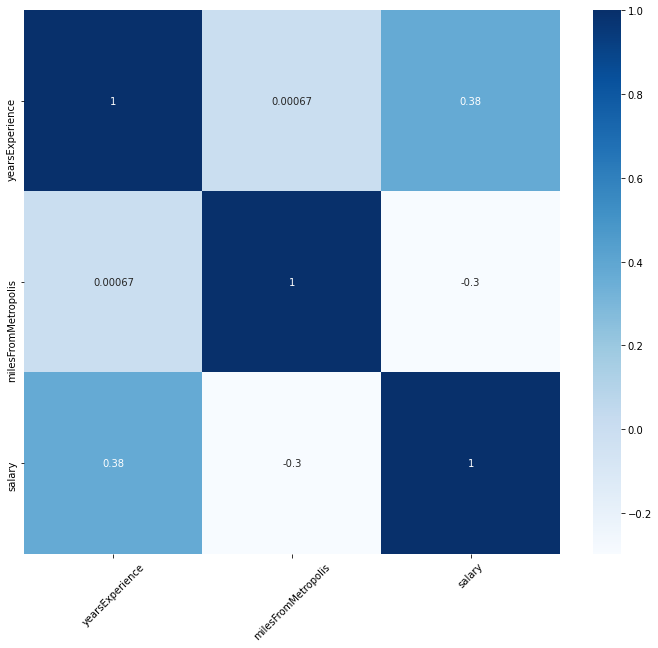

In [39]:
#Correlations between selected features and response
#jobId is discarded because it is unique for indiviuals
fig = plt.figure(figsize=(12,10))
features = ['companyId', 'jobType', 'degree', 'major', 'industry','yearsExperience', 'milesFromMetropolis']
sns.heatmap(train[features + ['salary']].corr(), cmap = 'Blues',annot =True)
plt.xticks(rotation = 45)
plt.show()

As indicated, jobType is most strongly correlated with salary ,followed by degree,major, and yearsExperience. Among the features, we see that degree and major have a strong correlation and jobType has a moderate degree of correlation with both degree and major. 

# 2. Develop 

### Utilizing MSE and RMSE to estimate the robustness of models 

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from math import sqrt

In [0]:
def one_hot_encode_feature_df (df,cat_vars=None, num_vars=None):
    '''performs one-hot encoding on all categorical variables and combines result with continous variables'''
    cat_df = pd.get_dummies(df[cat_vars])
    num_df = df[num_vars].apply(pd.to_numeric)
    return pd.concat([cat_df,num_df],axis = 1)#ignore_Index = False
def get_target_df(df,target):
    '''return target dataframe'''
    return df[target]
def train_model(model,feature_df,target_df,num_procs,mean_mse,cv_std):
    neg_mse = cross_val_score(model, feature_df,target_df,cv=5, n_jobs = num_procs, scoring = 'neg_mean_squared_error')
    mean_mse[model] = -1.0*np.mean(neg_mse)
    cv_std[model] = np.std(neg_mse)
def get_summary(model,mean_mse,cv_std):
    print('\nModel:\n',model)
    print('Average MSE:\n',mean_mse[model])
    print('Standard Deviation during CV:\n',cv_std[model])

def save_outcomes(model,mean_mse,predictions,feature_importances):
    '''save model,model summary,feature importance,and predictions'''
    with open ('model.txt','w') as file:
        file.write(str(model))
    feature_importances.to_csv('feature_importances.csv')
    np.savetxt('prediction.csv',predictions,delimiter = ',')


    
   

ENCODING DATA
Beginning cross validation

Model:
 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Average MSE:
 384.4335557165542
Standard Deviation during CV:
 0.9230627739689935


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning



Model:
 Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)
Average MSE:
 384.4361979579178
Standard Deviation during CV:
 0.9322828722734867

Model:
 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=25, max_features=30, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=60, min_weight_fraction_leaf=0.0,
                 

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 60building tree 2 of 60

building tree 3 of 60
building tree 4 of 60
building tree 5 of 60
building tree 6 of 60
building tree 7 of 60
building tree 8 of 60
building tree 9 of 60
building tree 10 of 60
building tree 11 of 60
building tree 12 of 60
building tree 13 of 60
building tree 14 of 60
building tree 15 of 60


[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:  1.1min


building tree 16 of 60
building tree 17 of 60
building tree 18 of 60
building tree 19 of 60
building tree 20 of 60
building tree 21 of 60
building tree 22 of 60
building tree 23 of 60
building tree 24 of 60
building tree 25 of 60
building tree 26 of 60
building tree 27 of 60
building tree 28 of 60
building tree 29 of 60
building tree 30 of 60
building tree 31 of 60
building tree 32 of 60
building tree 33 of 60
building tree 34 of 60
building tree 35 of 60
building tree 36 of 60
building tree 37 of 60
building tree 38 of 60
building tree 39 of 60
building tree 40 of 60
building tree 41 of 60
building tree 42 of 60
building tree 43 of 60
building tree 44 of 60
building tree 45 of 60
building tree 46 of 60
building tree 47 of 60
building tree 48 of 60
building tree 49 of 60
building tree 50 of 60
building tree 51 of 60
building tree 52 of 60
building tree 53 of 60
building tree 54 of 60
building tree 55 of 60
building tree 56 of 60
building tree 57 of 60
building tree 58 of 60
building tr

[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:  4.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    2.7s
[Parallel(n_jobs=2)]: Done  60 out of  60 | elapsed:   12.4s finished


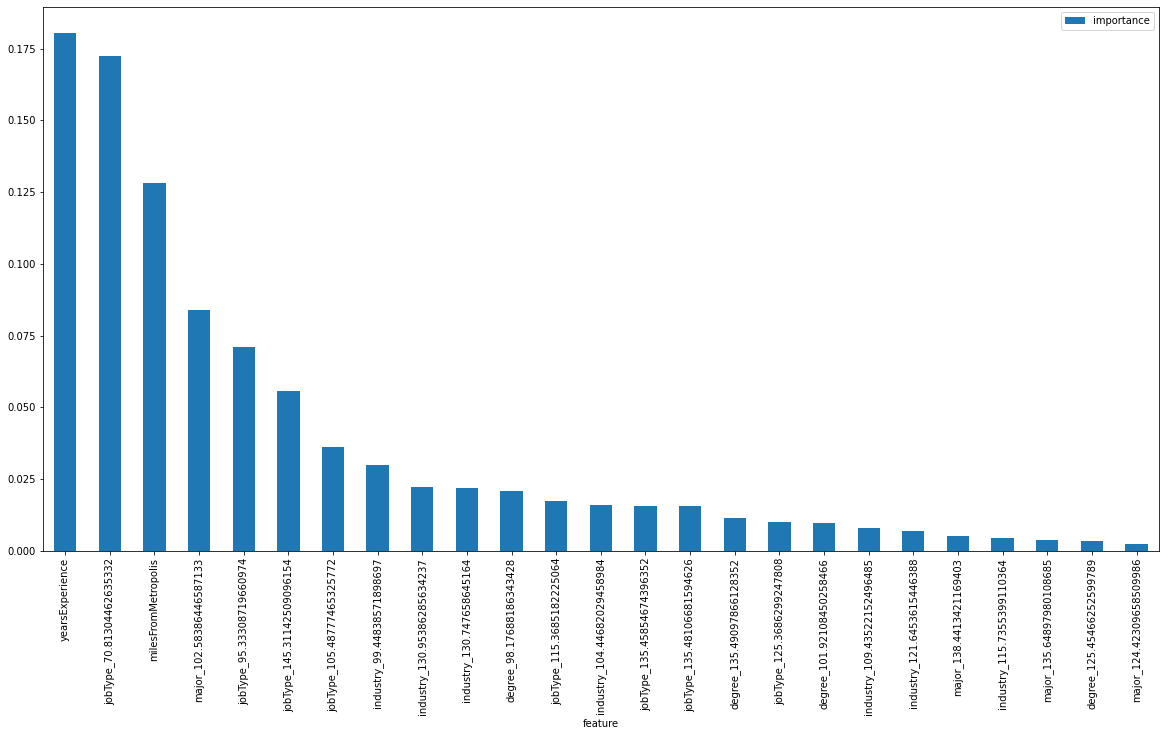

In [47]:
#define imputs
raw_train_df = train
test_feature_file = test_feature
    
#define variables
categorical_vars = ['companyId', 'jobType', 'degree', 'major', 'industry']
numeric_vars = ['yearsExperience', 'milesFromMetropolis']
target_var = 'salary'
    
#clean ,shuffle,and index training data --- shuffling may improve cross-validatation accuracy
clean_train = shuffle(raw_train_df).reset_index() #encode categorical data and get final feature dfs
print("ENCODING DATA")
feature_df = one_hot_encode_feature_df(clean_train,cat_vars = categorical_vars, num_vars = numeric_vars)
test_df = one_hot_encode_feature_df(test_feature_file,cat_vars =categorical_vars, num_vars = numeric_vars)
    
# get target df
target_df =get_target_df(clean_train,target_var)
    
#initialise model list and dicts
models = []
mean_mse = {}
cv_std = {}
res = {}

    
#define number of processes to run in parallel
num_procs =2
#shared model parameters 
verbose_lvl = 5 
#create models ---hyperparameters tuning already done by hand for each model
lr = LinearRegression()
lr_std_pca = make_pipeline(StandardScaler(),PCA(),LinearRegression())
rf = RandomForestRegressor(n_estimators=60,n_jobs = num_procs,max_depth=25,min_samples_split=60,\
                               max_features = 30, verbose = verbose_lvl)
gbm = GradientBoostingRegressor(n_estimators = 40, max_depth = 5, loss = 'ls',verbose=verbose_lvl)
    
models.extend([lr,lr_std_pca,rf,gbm])
    
# parallel cross-validation models, using MSE as evaluation metric,and print summaries
print("Beginning cross validation")
for model in models:
  train_model(model,feature_df,target_df,num_procs,mean_mse,cv_std)
  get_summary(model,mean_mse,cv_std)
# choose model with lowest mse
model = min(mean_mse, key = mean_mse.get)
print('\nPredictions calculated using model with lowest MSE:')
print(model)
#train model on entire dataset
model.fit(feature_df,target_df)
    
#Create predictions based on test data
predictions = model.predict(test_df)
#Store feature importances
if hasattr(model,'feature_importances_'):
  importances = model.feature_importances_
else:
  #linear models don't have feature_importances_
  importances = [0]*len(feature_df.columns)
feature_importances = pd.DataFrame({'feature':feature_df.columns,'importance':importances})
feature_importances.sort_values(by = 'importance',ascending =False, inplace= True)
# set index to 'feature'
feature_importances.set_index('feature',inplace =True,drop=True)
    
#creat plot 
feature_importances[0:25].plot.bar(figsize=(20,10))
plt.show()
    
#save outcomes
save_outcomes(model,mean_mse[model],predictions,feature_importances)   

In [48]:
!head feature_importances.csv
    
   

feature,importance
yearsExperience,0.18038309682885198
jobType_70.81304462635332,0.17232796278435128
milesFromMetropolis,0.12815922145508965
major_102.58386446587133,0.08380170007926512
jobType_95.33308719660974,0.07111313155191204
jobType_145.31142509096154,0.05580949775522051
jobType_105.48777465325772,0.03603539492641363
industry_99.44838571898697,0.02993914780527328
industry_130.95386285634237,0.022087938647103355
